# Lead Scoring Case Study

## X Education online sales

#### Problem Statement:



An education company named X Education sells online courses to industry professionals leveraging several websites and search engines.
People who browse the courses or fill up a form or watch videos about content may fill up a form or provide their contact information thus becoming leads. Leads are identified through referrals too. The company wants to improve the conversion rate for the leads.
X Education has reached out to us to help them select the most promising leads. We are provided with a leads dataset containing 9000  plus datapoints.

#### Goal

To build a logistic regression model to assign a lead score to each of the leads. A higher lead score means that the lead has higher likelihood of conversion.


In [634]:
# importing the required packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn import metrics
import statsmodels.api as sm

from random import sample
from numpy.random import uniform
from math import isnan

# Suppressing warnings 
import warnings
warnings.filterwarnings('ignore')

#setting display option to be able to see all columns 
pd.set_option('display.max_columns', 500)

# Step 1. Read and view the data

In [635]:
# read the dataset
education_df = pd.read_csv("Leads.csv", sep=",", encoding="ISO-8859-1", header=0)
education_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Inspecting the data frame 

In [636]:
# shape of the df
education_df.shape

(9240, 37)

In [637]:
# basics of the df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [638]:
# data range of the df
education_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2. Data Cleanup

The following columns uniquely identify the prospect and lead. These do not have a impact on the lead score nor help us during our analysis. So we will drop these columns

- Prospect Id
- Lead Number


In [639]:
columns_drop = ['Prospect ID', 'Lead Number']
education_df.drop(columns_drop, axis = 1, inplace=True)

####  Converting binary variables (Yes/No) to 0/1

In [640]:
###############################################################

# Function to map Yes and No Values to 1 and 0 respectively

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


# List of columns to map
binary_col_list =  ['Do Not Email', 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content',
            'I agree to pay the amount through cheque','A free copy of Mastering The Interview']



# Applying the function to the binary column list 
education_df[binary_col_list] = education_df[binary_col_list].apply(binary_map)

education_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [641]:
education_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,5022.000000,5022.000000,9240.0,9240.000000
mean,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,14.306252,16.344883,0.0,0.312554
std,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,1.386694,1.811395,0.0,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.000000,11.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,15.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,16.000000,0.0,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,15.000000,18.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,18.000000,20.000000,0.0,1.000000


#### Note that the following columns have all values (min, max, median, and mean ) as zero. This indicates that they all were answered as <i>"No"</i> for all the sample records in the data set. This can also be verified by using value_counts on these columns. We conclude that they will not add any value to the modelling or the predictions. Hence We will drop these columns before further analysis

- "Magazine"
- "Receive More Updates About Our Courses"
- "Update me on Supply Chain Content"
- "Get updates on DM Content"
- "I agree to pay the amount through cheque"


In [642]:
columns_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                'Get updates on DM Content','I agree to pay the amount through cheque']
education_df.drop(columns_drop, axis = 1, inplace=True)

###  Identify null values in the data frame and impute the same wherever possible

Before we analyze Null values , let's look at the categorical variables which are left unselected by the students. So we will look for <i><b>Select</b></i> value.These values can be replaced with null for missing data analysis.

In [643]:
## Replace the "Select" value with null in all columns using mask function. 
# this function will replace all the values in the dataframe with nan since we are not passing any new value to replace.
education_df.mask(education_df=='Select', inplace=True)

In [644]:
# Check for missing values
round(100*(education_df.isnull().sum())/len(education_df), 2).sort_values()

Lead Origin                                       0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
Lead Source                                       0.39
Last Activity                                     1.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Country                                          26.63
What is yo

A lot of these columns have blank values and hence we should drop these columns. We will consider a threshold of 40% for dropping the columns based on blank values.
- How did you hear about X Education 
- Lead Profile
- Lead Quality
- Asymmetrique Activity Index   
- Asymmetrique Profile Index   
- Asymmetrique Activity Score   
- Asymmetrique Profile Score  
- City

Also there are certain columns which are assigned to the case <b>after</b> the case has been closed or scores given by the sales person to the customer after the interactions. Hence these columns are not relevant anyways. Such columns are 
- Tags 
- Last Activity

We will also drop these columns. 

Note : We are not planning to drop the Last Notable Activity becasue it indicates what was the last notable activity by the customer <i>before</i> the case was closed. We would like to see if this has any influence based on the RFE or actual modelling. 

In [645]:
# Dropping the columns based on blank values or relevance for the analysis.
columns_drop = ['How did you hear about X Education', 'Lead Quality','Lead Profile',
                'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score',
                'Asymmetrique Profile Score', 'City', 'Tags', 'Last Activity']
education_df.drop(columns_drop, axis = 1, inplace=True)

education_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [646]:
# Check for missing values again 
round(100*(education_df.isnull().sum())/len(education_df), 2).sort_values()


Lead Origin                                       0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Source                                       0.39
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Country                                          26.63
What is your current occupation                  29.11
What matte

The following columns still have large null values. Let's analyse those for the value counts. 
- Specialization                                                  
- What matters most to you in choosing a course    
- What is your current occupation                    
- Country                                            
                                        

##### Also let's check for any rows which have high percentage of missing values across multiple columns 

In [647]:
# Checking for the rows which have more than 40% blank values in the row. 

indexNames = education_df[ round(100*(education_df.isnull().sum(axis=1))/len(education_df.columns), 2) > 40].index
indexNames.shape

(0,)

##### The number of rows with more than 40% blank values are zero after cleaning the columns. Hence no rows to be dropped for now. 

In [648]:
###############################################################
# Function for checking value counts percentages of a column 
def check_value_percentages(column):
    return (column.value_counts(normalize=True) * 100).sort_values(ascending=False)

In [649]:
# checking value counts of Country 
check_value_percentages(education_df['Country'])

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
South Africa             0.059006
Canada                   0.059006
Sweden                   0.044254
Asia/Pacific Region      0.029503
Belgium                  0.029503
Italy                    0.029503
China                    0.029503
Ghana                    0.029503
Netherlands              0.029503
Philippines              0.029503
Bangladesh               0.029503
Uganda                   0.029503
Tanzania                 0.014751
Malaysia      

<b>'Country'</b> Column can be <b>dropped</b> as the major part of the data is associated with India or blank values and the rest of the countries have very little presence. 

From a business aspect the <b>'Specialization'</b> Column is relevant in case of conversions. So we will retain this column and analyse it further.

In [650]:
# checking value of Specialization
check_value_percentages(education_df['Specialization'])

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

We will leave the remaining values of Specialisation as is since it looks a relevant column from business perspective for this analysis and the lowest % value is around 0.5%. We will replace the null values with "Unknown"

In [651]:
# replacing the null values with unknown value 
education_df['Specialization'].fillna("Unknown", inplace = True)

check_value_percentages(education_df['Specialization'])

Unknown                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [652]:
# checking value current occupation 
check_value_percentages(education_df['What is your current occupation'])

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [653]:
# replacing the null values with Other value since an Other category already exists
education_df['What is your current occupation'].fillna("Other", inplace = True)
check_value_percentages(education_df['What is your current occupation'])

Unemployed              60.606061
Other                   29.285714
Working Professional     7.640693
Student                  2.272727
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [654]:
# checking value of 'What matters most to you in choosing a course'
check_value_percentages(education_df['What matters most to you in choosing a course'])

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

<b>'What matters most to you in choosing a course'</b> Column can be dropped as there are not many different values here and it is very heavily skewed towards one value

##### Dropping the columns based on the value counts and null values 

In [655]:
# Dropping the columns based on values analysis done so far 
columns_drop = ['Country','What matters most to you in choosing a course']
education_df.drop(columns_drop, axis = 1, inplace=True)

education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null int64
Do Not Call                               9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Search                                    9240 non-null int64
Newspaper Article                         9240 non-null int64
X Education Forums                        9240 non-null int64
Newspaper                                 9240 non-null int64
Digital Advertise

##### Let's also check different uniq values in the remaining categorical columns
We will check for an skewed values or any columns which can be further rationalised to have meaningful split of values

In [656]:
# checking value of Lead Origin
check_value_percentages(education_df['Lead Origin'])

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [657]:
# checking value of Lead Source
check_value_percentages(education_df['Lead Source'])

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
youtubechannel        0.010865
WeLearn               0.010865
Pay per Click Ads     0.010865
testone               0.010865
blog                  0.010865
NC_EDM                0.010865
welearnblog_Home      0.010865
Name: Lead Source, dtype: float64

In [658]:
# Rationalizing the Lead source values 
# merging the two google values. 
education_df.loc[education_df['Lead Source'].isin(["google"]), ['Lead Source']] = "Google"

# merging all values with < 0.5% occurance into one category called Other
education_df.loc[education_df['Lead Source'].isin(['bing','Click2call','Press_Release','Social Media',
                                                   'Live Chat','Pay per Click Ads','welearnblog_Home',
                                                   'NC_EDM','blog','youtubechannel','testone','WeLearn']), ['Lead Source']] = "Other"

# replacing the null values with Other value 
education_df['Lead Source'].fillna("Other", inplace = True)

check_value_percentages(education_df['Lead Source'])

Google              31.093074
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Other                0.638528
Facebook             0.595238
Name: Lead Source, dtype: float64

In [659]:
# checking value of Last Notable Activity
check_value_percentages(education_df['Last Notable Activity'])

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Email Received                   0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

In [660]:
# merging all values with < 0.1% occurance into one category called Other
education_df.loc[education_df['Last Notable Activity'].isin(['Email Marked Spam',
                                                            'Form Submitted on Website','View in browser link Clicked',
                                                            'Resubscribed to emails','Email Received',
                                                            'Approached upfront']), ['Last Notable Activity']] = "Other"
# checking value of Last Activity
check_value_percentages(education_df['Last Notable Activity'])

Modified                    36.872294
Email Opened                30.595238
SMS Sent                    23.506494
Page Visited on Website      3.441558
Olark Chat Conversation      1.980519
Email Link Clicked           1.872294
Email Bounced                0.649351
Unsubscribed                 0.508658
Unreachable                  0.346320
Had a Phone Conversation     0.151515
Other                        0.075758
Name: Last Notable Activity, dtype: float64

In [661]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int64
Do Not Call                               9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Search                                    9240 non-null int64
Newspaper Article                         9240 non-null int64
X Education Forums                        9240 non-null int64
Newspaper                                 9240 non-null int64
Digital Advertise

In [662]:
# Checking for total number of missing values one more time 
round(100*(education_df.isnull().sum())/len(education_df), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [663]:
# Now let's check the binary variables for Yes and No value counts 
education_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [664]:
check_value_percentages(education_df['Do Not Email'])

0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64

In [665]:
check_value_percentages(education_df['Do Not Call'])

0    99.978355
1     0.021645
Name: Do Not Call, dtype: float64

In [666]:
check_value_percentages(education_df['Search'])

0    99.848485
1     0.151515
Name: Search, dtype: float64

In [667]:
check_value_percentages(education_df['Newspaper Article'])

0    99.978355
1     0.021645
Name: Newspaper Article, dtype: float64

In [668]:
check_value_percentages(education_df['X Education Forums'])

0    99.989177
1     0.010823
Name: X Education Forums, dtype: float64

In [669]:
check_value_percentages(education_df['Newspaper'])

0    99.989177
1     0.010823
Name: Newspaper, dtype: float64

In [670]:
check_value_percentages(education_df['Digital Advertisement'])

0    99.95671
1     0.04329
Name: Digital Advertisement, dtype: float64

In [671]:
check_value_percentages(education_df['Through Recommendations'])

0    99.924242
1     0.075758
Name: Through Recommendations, dtype: float64

In [672]:
check_value_percentages(education_df['A free copy of Mastering The Interview'])

0    68.744589
1    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

The above value counts indicate a very heavy skewed values (almosr 99%) towards one answer for the below columns. Hence dropping these columns 
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

In [673]:
# Dropping the columns based on values analysis done for the value counts of the binary variables 
columns_drop = ['Do Not Call','Search','Newspaper Article','X Education Forums',
                'Newspaper','Digital Advertisement','Through Recommendations']
education_df.drop(columns_drop, axis = 1, inplace=True)

education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
A free copy of Mastering The Interview    9240 non-null int64
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [674]:
# Checking the remaining rows and columns 
education_df.shape

(9240, 11)

### Finding the Outliers for Numerical Fields and handling those 

Handling the Continuous numeric values by 
    1. Checking the range using describe function 
    2. Drawing the boxplot to check the maximum range and also to check the outliers 
    3. Capping the column and imputing the null values

In [675]:
# Function to display box plot for univariate analysis 
def disp_boxplot(column):
    plt.figure(figsize=[10,2])
    sns.boxplot(column)
    plt.show()
    
########################################################################

# Function to Display horizontal or vertical bar chart 
def disp_barChart(df, x_val, y_val, hor_orient): 
    plt.title(y_val + '  Vs  ' +  x_val )
    plt.ylabel(y_val)
    if(hor_orient):
        df.groupby([x_val])[y_val].mean().sort_values(ascending=True).plot.barh()
    else:
        df.groupby([x_val])[y_val].mean().sort_values(ascending=False).plot.bar()
    plt.show()    
    
########################################################################
    
# Function to cap the higher outliers of  the column to the 99 quantile value
def cap_higher_range(df,col_name): 
    q2 = df[col_name].quantile(0.99)
    df[col_name][df[col_name]>=q2]=q2

In [676]:
# Checking for outliers in the continuous variables
num_education_df = education_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_education_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


From the above, we can see that we have outliers for the following columns
- TotalVisits
- Total Time Spent on Website
- Page Views per Visit


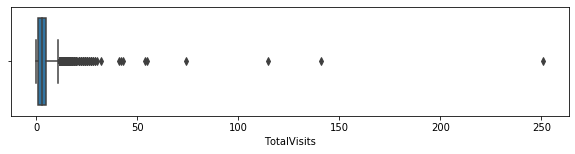

In [677]:
disp_boxplot(education_df['TotalVisits'])

In [678]:
# inputting the missing values of total visits with 50% quantile value since it is almost similar to mean 
education_df['TotalVisits'].fillna(3, inplace = True)

## Capping Total Visits at Higher range for 99 percentile value
cap_higher_range(education_df, 'TotalVisits')

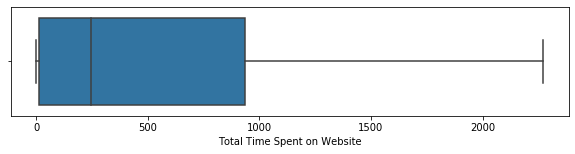

In [679]:
# Checking 'Total Time Spent on Website'
disp_boxplot(education_df['Total Time Spent on Website'])

In [680]:
## Capping Total Time Spent on Website at Higher range
cap_higher_range(education_df, 'Total Time Spent on Website')

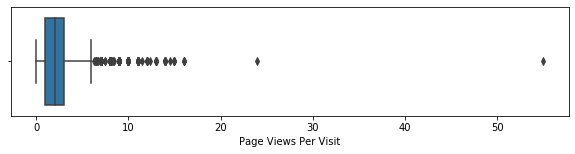

In [681]:
disp_boxplot(education_df['Page Views Per Visit'])

In [682]:
# inputting the missing values of Page Views per visit with 50% quantile value since it is almost similar to mean 
education_df['Page Views Per Visit'].fillna(2, inplace = True)
## Capping Page Views per visit at Higher range
cap_higher_range(education_df, 'Page Views Per Visit')

In [683]:
# Checking for outliers in the continuous variables one more time 
num_education_df = education_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_education_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.327814,486.510793,2.329050
std,3.228466,544.845436,1.971347
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.372100,9.000000


In [684]:
education_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0.0,0.0,Unknown,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674.0,2.5,Unknown,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Unknown,Unemployed,0,Modified


In [685]:
### Checking the Conversion Rate 
conversion_ratio = (sum(education_df['Converted'])/len(education_df['Converted'].index))*100
conversion_ratio

38.53896103896104

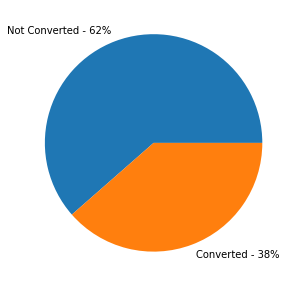

In [686]:
Values = ['Not Converted - 62%', 'Converted - 38%'] 
 
# Creating plot 
fig = plt.figure(figsize =(5, 5)) 
plt.pie(education_df.Converted.value_counts(), labels = Values) 
  
# show plot 
plt.show() 

We have almost 38% conversion ratio and hence the data is good for modelling 

# Step 3. Data Preparation

Let's perform certain basic steps which are required for model building. 

## 3.1 - Create dummy features for categorical variables (one-hot encoded)

In [687]:
# Function to create Dummy variables 

def create_dummy_var(df, col_name, pref):
    # Let's drop the first column from var df using 'drop_first = True'
    dummy_var = pd.get_dummies(df[col_name], drop_first = True, prefix=pref)
    # Add the results to the original boombikes dataframe
    return pd.concat([df, dummy_var], axis = 1)

In [688]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null float64
Page Views Per Visit                      9240 non-null float64
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
A free copy of Mastering The Interview    9240 non-null int64
Last Notable Activity                     9240 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 794.2+ KB


In [689]:
# Creating Dummy variables for all the categorical variables. 
education_df = create_dummy_var(education_df,'Lead Origin','LeadOrigin')
education_df = create_dummy_var(education_df,'Lead Source','LeadSrc')
education_df = create_dummy_var(education_df,'Specialization','Specialization')
education_df = create_dummy_var(education_df,'What is your current occupation','Occupation')
education_df = create_dummy_var(education_df,'Last Notable Activity','Lst_Not_Act')

In [690]:
# inspect the dataframe 
education_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSrc_Facebook,LeadSrc_Google,LeadSrc_Olark Chat,LeadSrc_Organic Search,LeadSrc_Other,LeadSrc_Reference,LeadSrc_Referral Sites,LeadSrc_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lst_Not_Act_Email Link Clicked,Lst_Not_Act_Email Opened,Lst_Not_Act_Had a Phone Conversation,Lst_Not_Act_Modified,Lst_Not_Act_Olark Chat Conversation,Lst_Not_Act_Other,Lst_Not_Act_Page Visited on Website,Lst_Not_Act_SMS Sent,Lst_Not_Act_Unreachable,Lst_Not_Act_Unsubscribed
0,API,Olark Chat,0,0,0.0,0.0,0.0,Unknown,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Unknown,Unemployed,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Business Administration,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Media and Advertising,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Unknown,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [691]:
# Dropping the columns for which the dummy variables have been created.
columns_drop = ['Lead Origin','Lead Source','Specialization',
                'What is your current occupation', 'Last Notable Activity']
education_df.drop(columns_drop, axis = 1, inplace=True)

education_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSrc_Facebook,LeadSrc_Google,LeadSrc_Olark Chat,LeadSrc_Organic Search,LeadSrc_Other,LeadSrc_Reference,LeadSrc_Referral Sites,LeadSrc_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lst_Not_Act_Email Link Clicked,Lst_Not_Act_Email Opened,Lst_Not_Act_Had a Phone Conversation,Lst_Not_Act_Modified,Lst_Not_Act_Olark Chat Conversation,Lst_Not_Act_Other,Lst_Not_Act_Page Visited on Website,Lst_Not_Act_SMS Sent,Lst_Not_Act_Unreachable,Lst_Not_Act_Unsubscribed
0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428.0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [692]:
# Renaming a few columns to make the names smaller 
education_df.rename(columns = {'Do Not Email':'DN_Email',
                                 'Total Time Spent on Website':'Web_Time',
                              'Page Views Per Visit':'pg_per_visit',
                              'A free copy of Mastering The Interview':'Free_Mast_Interview'}, inplace = True) 

## 3.2 - Test-Train Split

In [693]:
# Putting feature variable to X
X = education_df.drop(['Converted'], axis=1)

X.head()

,DN_Email,TotalVisits,Web_Time,pg_per_visit,Free_Mast_Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSrc_Facebook,LeadSrc_Google,LeadSrc_Olark Chat,LeadSrc_Organic Search,LeadSrc_Other,LeadSrc_Reference,LeadSrc_Referral Sites,LeadSrc_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lst_Not_Act_Email Link Clicked,Lst_Not_Act_Email Opened,Lst_Not_Act_Had a Phone Conversation,Lst_Not_Act_Modified,Lst_Not_Act_Olark Chat Conversation,Lst_Not_Act_Other,Lst_Not_Act_Page Visited on Website,Lst_Not_Act_SMS Sent,Lst_Not_Act_Unreachable,Lst_Not_Act_Unsubscribed
0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428.0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [694]:
# Putting response variable to y
y = education_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [695]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 3.3 - Feature Scaling

In [696]:
# Scaling the Numeric columns 
numeric_columns = ['TotalVisits','Web_Time','pg_per_visit']

# Using standardization for scaling the Numeric columns. 
scaler = StandardScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_train.head()

,DN_Email,TotalVisits,Web_Time,pg_per_visit,Free_Mast_Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSrc_Facebook,LeadSrc_Google,LeadSrc_Olark Chat,LeadSrc_Organic Search,LeadSrc_Other,LeadSrc_Reference,LeadSrc_Referral Sites,LeadSrc_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lst_Not_Act_Email Link Clicked,Lst_Not_Act_Email Opened,Lst_Not_Act_Had a Phone Conversation,Lst_Not_Act_Modified,Lst_Not_Act_Olark Chat Conversation,Lst_Not_Act_Other,Lst_Not_Act_Page Visited on Website,Lst_Not_Act_SMS Sent,Lst_Not_Act_Unreachable,Lst_Not_Act_Unsubscribed
1871,0,-1.022595,-0.888014,-1.180474,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.205373,0.007668,-0.503379,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3516,0,0.512365,-0.693060,0.092260,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8105,0,0.512365,1.374181,1.364995,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.022595,-0.888014,-1.180474,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## 3.4 - Checking the Correlation Matrix

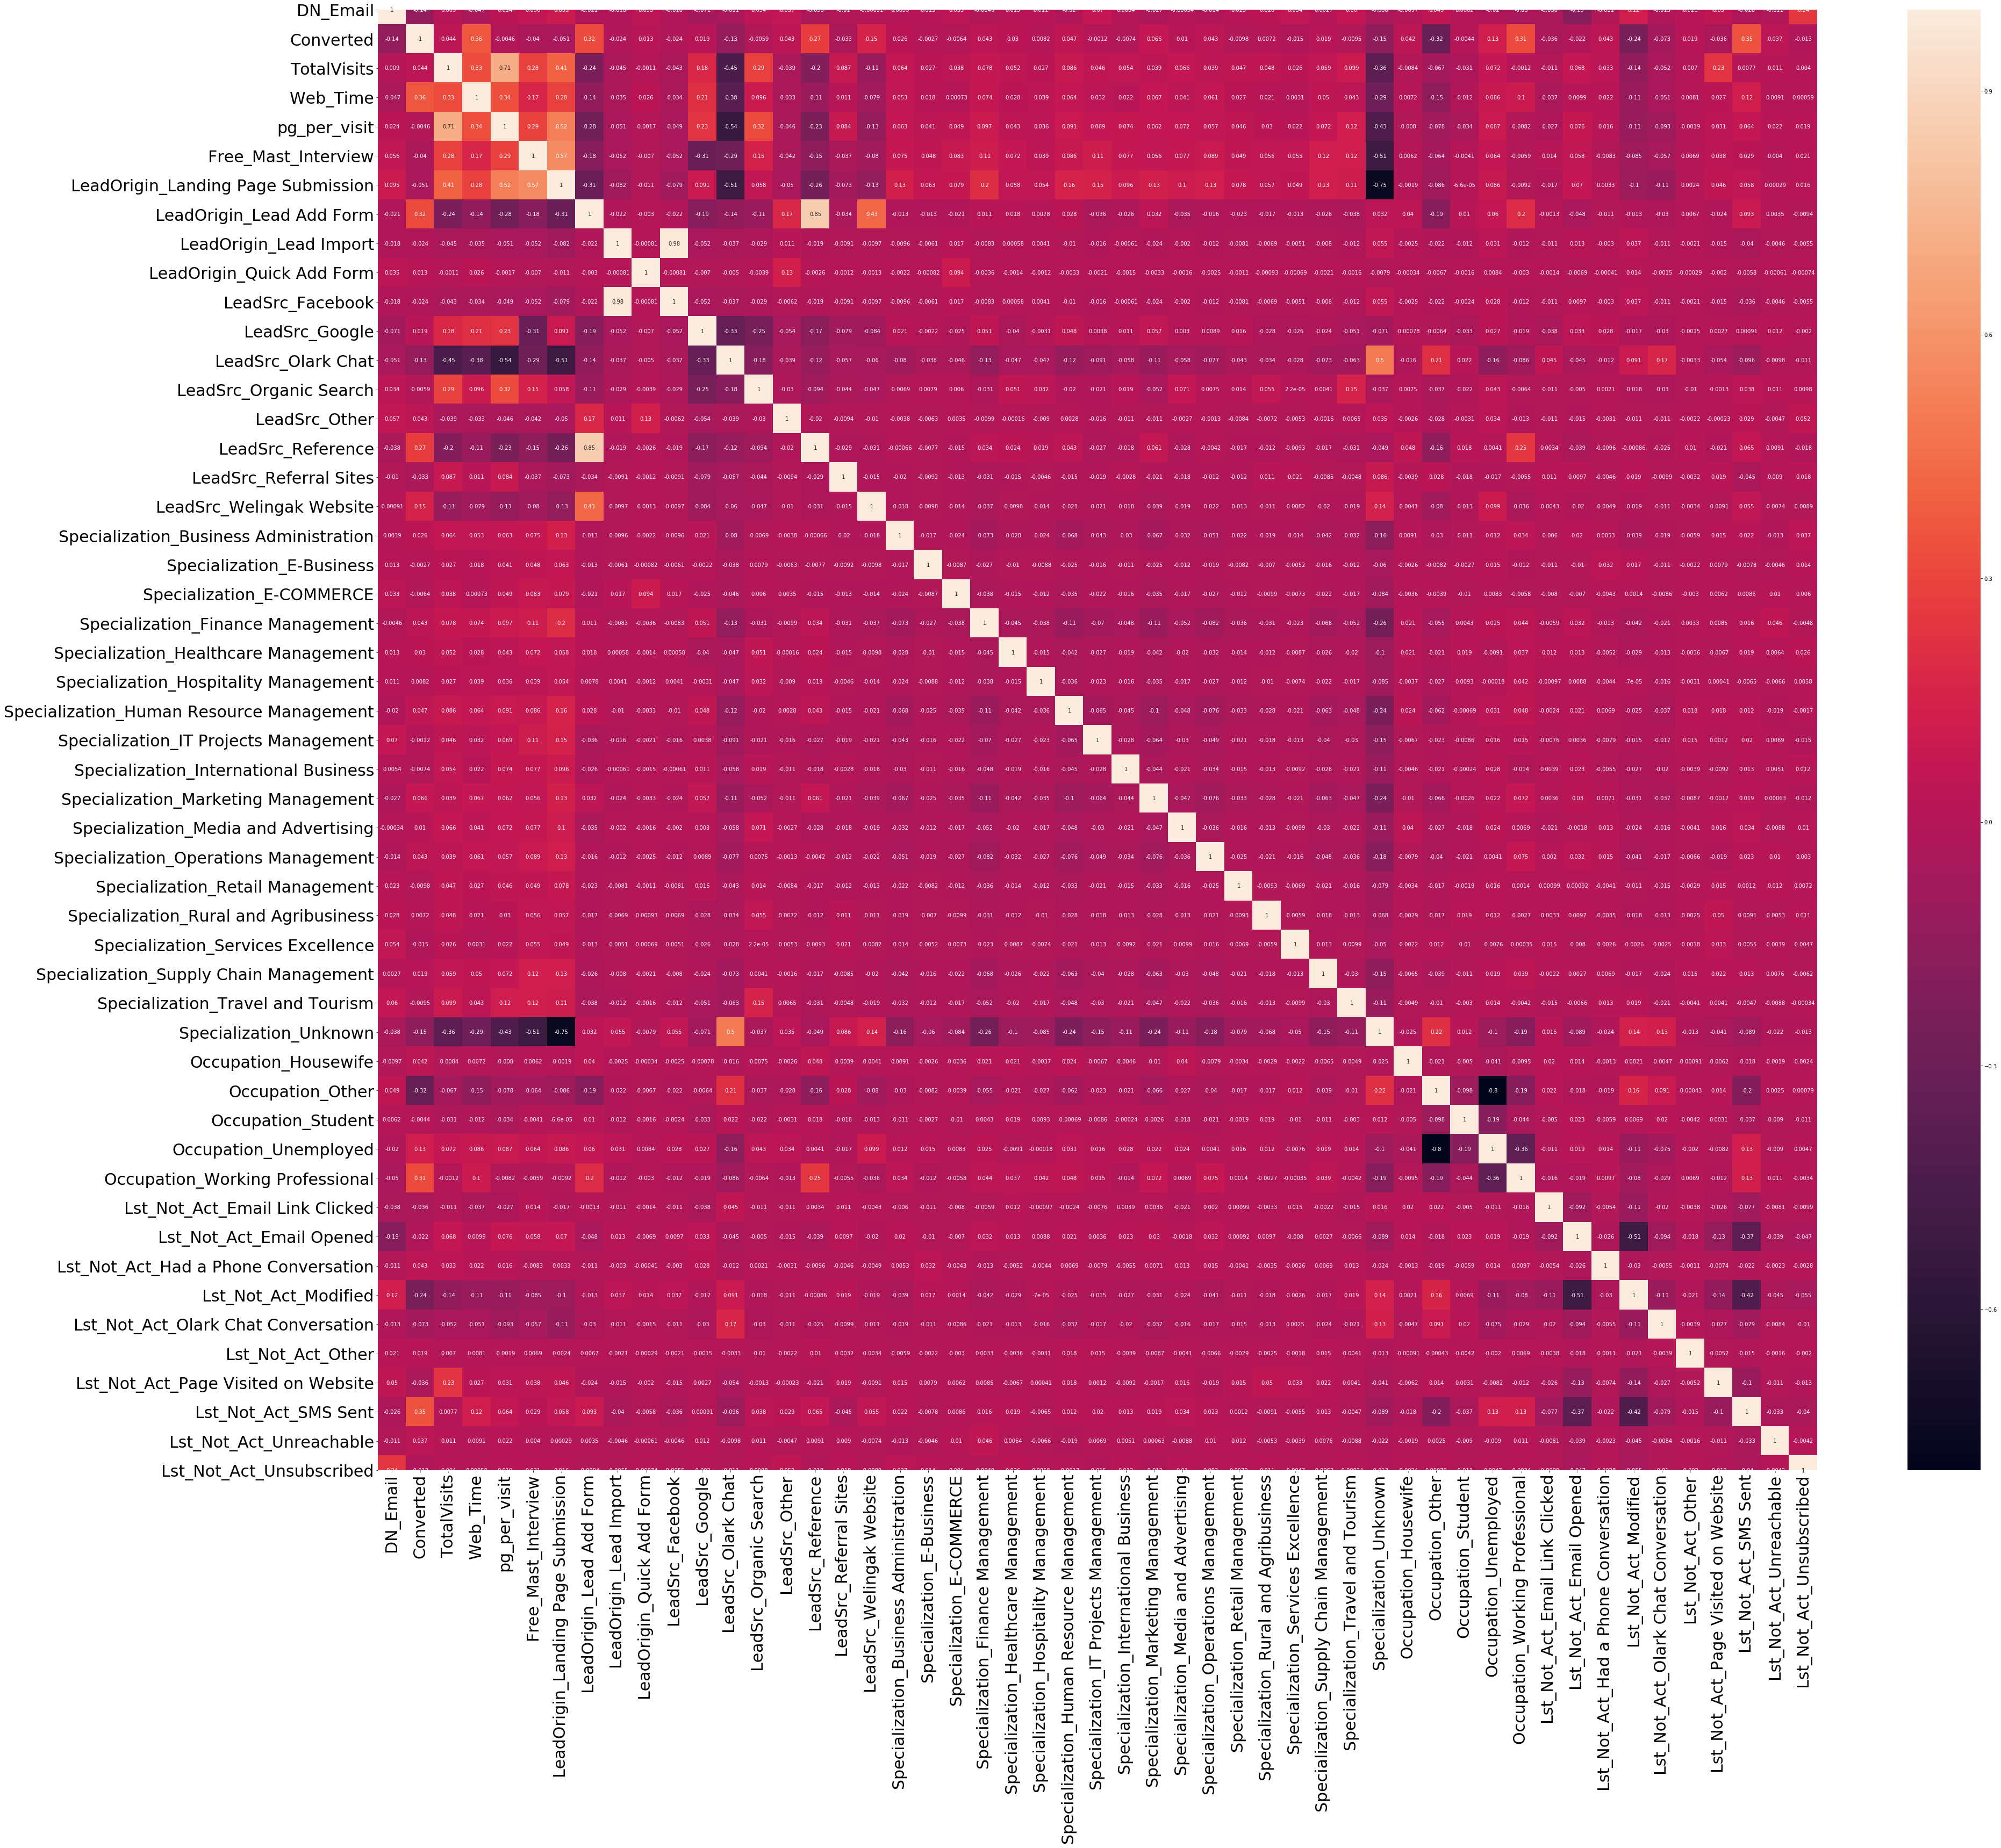

In [697]:
plt.figure(figsize = (60,50))        # Size of the figure
sns.heatmap(education_df.corr(),annot = True)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.show()

The Correlation Matrix indicates a very high correlation of 'Specialization_Unknown' with most of the numeric columns. It also shows a very high correlation of 'Occupation_Other' with the 'Occupation_Unemployed' columns. 
Dropping columns based on high co-relations and the fact that those were created by us for handling the null values. 

In [698]:
X_test = X_test.drop(['Specialization_Unknown','Occupation_Other'], 1)
X_train = X_train.drop(['Specialization_Unknown','Occupation_Other'], 1)

In [699]:
X_train.head()

,DN_Email,TotalVisits,Web_Time,pg_per_visit,Free_Mast_Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSrc_Facebook,LeadSrc_Google,LeadSrc_Olark Chat,LeadSrc_Organic Search,LeadSrc_Other,LeadSrc_Reference,LeadSrc_Referral Sites,LeadSrc_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lst_Not_Act_Email Link Clicked,Lst_Not_Act_Email Opened,Lst_Not_Act_Had a Phone Conversation,Lst_Not_Act_Modified,Lst_Not_Act_Olark Chat Conversation,Lst_Not_Act_Other,Lst_Not_Act_Page Visited on Website,Lst_Not_Act_SMS Sent,Lst_Not_Act_Unreachable,Lst_Not_Act_Unsubscribed
1871,0,-1.022595,-0.888014,-1.180474,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.205373,0.007668,-0.503379,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3516,0,0.512365,-0.693060,0.092260,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8105,0,0.512365,1.374181,1.364995,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.022595,-0.888014,-1.180474,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


# Step 4: Model Building


In [700]:
################################################################################################

# Function for adding the constant to the datframe 
def add_constant(X_train_param):
    # Adding a constant variable 
    import statsmodels.api as sm  
    return sm.add_constant(X_train_param)

################################################################################################

# Function for constructing the model 
def construct_model(X_train_param, y_train): 
    logm = sm.GLM(y_train,(add_constant(X_train_param)), family = sm.families.Binomial()).fit()  
    print(logm.summary())
    return logm

################################################################################################

# Function for dropping a column from the dataframe 
def drop_column(X_train_param, col_name):
    return X_train_param.drop([col_name], axis = 1)

################################################################################################

# Function for building VIF 
def build_vif(X_train_param):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_param.columns
    vif['VIF'] = [variance_inflation_factor(X_train_param.values, i) for i in range(X_train_param.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

## 4.1 - Feature Selection Using RFE

In [701]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [702]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [703]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [704]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('DN_Email', True, 1),
 ('TotalVisits', False, 16),
 ('Web_Time', True, 1),
 ('pg_per_visit', False, 17),
 ('Free_Mast_Interview', False, 18),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 22),
 ('LeadOrigin_Quick Add Form', False, 15),
 ('LeadSrc_Facebook', False, 21),
 ('LeadSrc_Google', False, 13),
 ('LeadSrc_Olark Chat', True, 1),
 ('LeadSrc_Organic Search', False, 24),
 ('LeadSrc_Other', False, 10),
 ('LeadSrc_Reference', True, 1),
 ('LeadSrc_Referral Sites', False, 23),
 ('LeadSrc_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 11),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 12),
 ('Specialization_Human Resource Management', False, 6),
 ('Specialization_IT Projects Management', True

In [705]:
# Columns which will be included in the modelling exercise
col = X_train.columns[rfe.support_]
print(col)

Index(['DN_Email', 'Web_Time', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSrc_Olark Chat', 'LeadSrc_Reference',
       'LeadSrc_Welingak Website', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Lst_Not_Act_Email Link Clicked',
       'Lst_Not_Act_Email Opened', 'Lst_Not_Act_Had a Phone Conversation',
       'Lst_Not_Act_Modified', 'Lst_Not_Act_Olark Chat Conversation',
       'Lst_Not_Act_Other', 'Lst_Not_Act_Page Visited on Website',
       'Lst_Not_Act_SMS Sent', 'Lst_Not_Act_Unreachable'],
      dtype='object')


In [706]:
# Columns which will be excluded from the modellling exercise
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'pg_per_visit', 'Free_Mast_Interview',
       'LeadOrigin_Lead Import', 'LeadOrigin_Quick Add Form',
       'LeadSrc_Facebook', 'LeadSrc_Google', 'LeadSrc_Organic Search',
       'LeadSrc_Other', 'LeadSrc_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lst_Not_Act_Unsubscribed'],
      dtype='object')

## 4.2 - Assessing the model with StatsModels

In [707]:
################################################################################################

# Function for constructing the model 
def predict_values(log_mod, X_train_param, y_train_param, probability_cutoff): 
    
    # Getting the predicted values on the train set
    y_train_pred_ret = log_mod.predict(X_train_param)
    y_train_pred_ret = y_train_pred_ret.values.reshape(-1)
    
    # Creating a dataframe with the actual Converted flag and the predicted probabilities
    y_train_pred_final_ret = pd.DataFrame({'Converted':y_train_param.values, 'Convert_Prob':y_train_pred_ret})
    y_train_pred_final_ret['CustID'] = y_train_param.index
    
    #Creating new column 'predicted' with 1 if Churn_Prob > probability_cutoff else 0
    y_train_pred_final_ret['predicted'] = y_train_pred_final_ret.Convert_Prob.map(lambda x: 1 if x > probability_cutoff else 0)
    
    return y_train_pred_final_ret

#################################################################################

# Function for creating the confusion matrix
def construct_conf_matrix(y_train_pred_param):
    # Confusion matrix 
    confusion = metrics.confusion_matrix(y_train_pred_param.Converted, y_train_pred_param.predicted )
    print(confusion)
    return confusion

################################################################################################

# Function for computing the accuracy 
def compute_accuracy(y_train_pred_param):
    accuracy_ret = metrics.accuracy_score(y_train_pred_param.Converted, y_train_pred_param.predicted)
    print("Accuracy : " + str(accuracy_ret))
    return accuracy_ret

################################################################################################

# Function for Computing Sensitivity 
def compute_sensitivity(confusion_matrix): 
    TP = confusion_matrix[1,1] # true positive 
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    sensitivity = TP / float(TP+FN)
    print("Sensitivity : " + str(sensitivity))
    return sensitivity

In [708]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#Creating the first model with all RFE columns 
X_train_sm = add_constant(X_train_rfe)
lm_1 = construct_model(X_train_sm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.5
Date:                Sun, 06 Sep 2020   Deviance:                       5249.1
Time:                        17:48:34   Pearson chi2:                 6.81e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [709]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_1, X_train_sm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.308964,1871,0
1,0,0.236658,6795,0
2,0,0.357336,3516,0
3,0,0.834172,8105,1
4,0,0.186022,3934,0


In [710]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3565  437]
 [ 732 1734]]


In [711]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8192640692640693
Sensitivity : 0.7031630170316302


In [712]:
# check VIF 
build_vif(X_train_rfe)

,Features,VIF
3,LeadOrigin_Lead Add Form,16.13
5,LeadSrc_Reference,12.98
2,LeadOrigin_Landing Page Submission,3.81
6,LeadSrc_Welingak Website,3.77
14,Occupation_Unemployed,3.32
19,Lst_Not_Act_Modified,2.98
17,Lst_Not_Act_Email Opened,2.92
23,Lst_Not_Act_SMS Sent,2.83
4,LeadSrc_Olark Chat,2.17
15,Occupation_Working Professional,1.46


In [713]:
# dropping the Occupation_Housewife variable which has a very high p value 
X_train_new = drop_column(X_train_rfe, "Occupation_Housewife")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_2 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.0
Date:                Sun, 06 Sep 2020   Deviance:                       5271.9
Time:                        17:48:34   Pearson chi2:                 6.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [714]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_2, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.306958,1871,0
1,0,0.237589,6795,0
2,0,0.355088,3516,0
3,0,0.833554,8105,1
4,0,0.184762,3934,0


In [715]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3563  439]
 [ 735 1731]]


In [716]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8184910327767471
Sensitivity : 0.7019464720194647


So overall the accuracy hasn't dropped much after dropping House wife occupation column.

In [717]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
3,LeadOrigin_Lead Add Form,16.13
5,LeadSrc_Reference,12.97
2,LeadOrigin_Landing Page Submission,3.81
6,LeadSrc_Welingak Website,3.77
13,Occupation_Unemployed,3.30
18,Lst_Not_Act_Modified,2.97
16,Lst_Not_Act_Email Opened,2.92
22,Lst_Not_Act_SMS Sent,2.83
4,LeadSrc_Olark Chat,2.17
14,Occupation_Working Professional,1.46


In [718]:
# dropping the "Lst_Not_Act_Email Opened" variable which has a very high p value 
X_train_new = drop_column(X_train_new, "Lst_Not_Act_Email Opened")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_3 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.6
Date:                Sun, 06 Sep 2020   Deviance:                       5273.2
Time:                        17:48:35   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [719]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_3, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.309364,1871,0
1,0,0.239252,6795,0
2,0,0.357715,3516,0
3,0,0.832909,8105,1
4,0,0.184078,3934,0


In [720]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3562  440]
 [ 734 1732]]


In [721]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8184910327767471
Sensitivity : 0.7023519870235199


In [722]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
3,LeadOrigin_Lead Add Form,16.07
5,LeadSrc_Reference,12.97
6,LeadSrc_Welingak Website,3.77
2,LeadOrigin_Landing Page Submission,2.65
13,Occupation_Unemployed,2.52
17,Lst_Not_Act_Modified,1.75
21,Lst_Not_Act_SMS Sent,1.67
4,LeadSrc_Olark Chat,1.64
14,Occupation_Working Professional,1.36
1,Web_Time,1.26


In [723]:
# dropping the "Lst_Not_Act_Page Visited on Website" variable which has a very high p value 
X_train_new = drop_column(X_train_new, "Lst_Not_Act_Page Visited on Website")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_4 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.5
Date:                Sun, 06 Sep 2020   Deviance:                       5274.9
Time:                        17:48:35   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [724]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_4, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.305396,1871,0
1,0,0.235111,6795,0
2,0,0.353391,3516,0
3,0,0.832657,8105,1
4,0,0.184709,3934,0


In [725]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3563  439]
 [ 737 1729]]


In [726]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8181818181818182
Sensitivity : 0.7011354420113545


The accuracy is still practically the same.

In [727]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
3,LeadOrigin_Lead Add Form,16.06
5,LeadSrc_Reference,12.97
6,LeadSrc_Welingak Website,3.77
2,LeadOrigin_Landing Page Submission,2.60
13,Occupation_Unemployed,2.50
17,Lst_Not_Act_Modified,1.70
4,LeadSrc_Olark Chat,1.63
20,Lst_Not_Act_SMS Sent,1.63
14,Occupation_Working Professional,1.36
1,Web_Time,1.26


In [728]:
# dropping the "LeadSrc_Reference" variable which has a very high p and VIF value 
X_train_new = drop_column(X_train_new, "LeadSrc_Reference")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_5 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.3
Date:                Sun, 06 Sep 2020   Deviance:                       5276.5
Time:                        17:48:36   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [729]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_5, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.305377,1871,0
1,0,0.235307,6795,0
2,0,0.353355,3516,0
3,0,0.832490,8105,1
4,0,0.184786,3934,0


In [730]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3563  439]
 [ 738 1728]]


In [731]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8180272108843537
Sensitivity : 0.7007299270072993


The accuracy is still practically the same.

In [732]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
2,LeadOrigin_Landing Page Submission,2.60
12,Occupation_Unemployed,2.50
16,Lst_Not_Act_Modified,1.70
3,LeadOrigin_Lead Add Form,1.69
4,LeadSrc_Olark Chat,1.63
19,Lst_Not_Act_SMS Sent,1.63
13,Occupation_Working Professional,1.35
1,Web_Time,1.26
5,LeadSrc_Welingak Website,1.24
7,Specialization_Finance Management,1.20


In [733]:
# dropping the "Specialization_Healthcare Management" variable which has a very high p value 
X_train_new = drop_column(X_train_new, "Specialization_Healthcare Management")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_6 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.5
Date:                Sun, 06 Sep 2020   Deviance:                       5279.0
Time:                        17:48:37   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [734]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_6, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.305980,1871,0
1,0,0.237758,6795,0
2,0,0.354016,3516,0
3,0,0.834161,8105,1
4,0,0.184692,3934,0


In [735]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3565  437]
 [ 736 1730]]


In [736]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8186456400742115
Sensitivity : 0.7015409570154095


The accuracy is still practically the same.

In [737]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
2,LeadOrigin_Landing Page Submission,2.58
11,Occupation_Unemployed,2.50
15,Lst_Not_Act_Modified,1.70
3,LeadOrigin_Lead Add Form,1.68
18,Lst_Not_Act_SMS Sent,1.63
4,LeadSrc_Olark Chat,1.62
12,Occupation_Working Professional,1.35
1,Web_Time,1.26
5,LeadSrc_Welingak Website,1.24
7,Specialization_Finance Management,1.20


In [738]:
# dropping the "Specialization_E-COMMERCE" variable which has a very high p value 
X_train_new = drop_column(X_train_new, "Specialization_E-COMMERCE")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_7 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.8
Date:                Sun, 06 Sep 2020   Deviance:                       5281.6
Time:                        17:48:37   Pearson chi2:                 6.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [739]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_7, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.306032,1871,0
1,0,0.240024,6795,0
2,0,0.353969,3516,0
3,0,0.835813,8105,1
4,0,0.185219,3934,0


In [740]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3565  437]
 [ 733 1733]]


In [741]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8191094619666048
Sensitivity : 0.702757502027575


The accuracy is still practically the same.

In [742]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
2,LeadOrigin_Landing Page Submission,2.55
10,Occupation_Unemployed,2.50
14,Lst_Not_Act_Modified,1.70
3,LeadOrigin_Lead Add Form,1.68
17,Lst_Not_Act_SMS Sent,1.63
4,LeadSrc_Olark Chat,1.62
11,Occupation_Working Professional,1.35
1,Web_Time,1.26
5,LeadSrc_Welingak Website,1.24
6,Specialization_Finance Management,1.19


In [743]:
# Note that "Lst_Not_Act_Other" and "Lst_Not_Act_Email Link Clicked" have the highest P value 
# but the VIF for "Lst_Not_Act_Email Link Clicked" is higher than "Lst_Not_Act_Other"
# So dropping the "Lst_Not_Act_Email Link Clicked" variable 
X_train_new = drop_column(X_train_new, "Lst_Not_Act_Email Link Clicked")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_8 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.3
Date:                Sun, 06 Sep 2020   Deviance:                       5284.6
Time:                        17:48:37   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [744]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_8, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.300274,1871,0
1,0,0.236631,6795,0
2,0,0.347836,3516,0
3,0,0.836375,8105,1
4,0,0.184299,3934,0


In [745]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3567  435]
 [ 733 1733]]


In [746]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8194186765615337
Sensitivity : 0.702757502027575


Both the accuracy and sensitivity are now improved. 

In [747]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
2,LeadOrigin_Landing Page Submission,2.53
10,Occupation_Unemployed,2.49
13,Lst_Not_Act_Modified,1.68
3,LeadOrigin_Lead Add Form,1.68
16,Lst_Not_Act_SMS Sent,1.61
4,LeadSrc_Olark Chat,1.60
11,Occupation_Working Professional,1.35
1,Web_Time,1.25
5,LeadSrc_Welingak Website,1.24
6,Specialization_Finance Management,1.19


In [748]:
# dropping the "Lst_Not_Act_Other" variable which has a very high p value 
X_train_new = drop_column(X_train_new, "Lst_Not_Act_Other")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_9 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.8
Date:                Sun, 06 Sep 2020   Deviance:                       5287.6
Time:                        17:48:38   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [749]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_9, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.301022,1871,0
1,0,0.237035,6795,0
2,0,0.348655,3516,0
3,0,0.836245,8105,1
4,0,0.184241,3934,0


In [750]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3567  435]
 [ 734 1732]]


In [751]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8192640692640693
Sensitivity : 0.7023519870235199


Both the accuracy and sensitivity are practically the same. 

In [752]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
2,LeadOrigin_Landing Page Submission,2.53
10,Occupation_Unemployed,2.49
3,LeadOrigin_Lead Add Form,1.68
13,Lst_Not_Act_Modified,1.68
15,Lst_Not_Act_SMS Sent,1.61
4,LeadSrc_Olark Chat,1.60
11,Occupation_Working Professional,1.35
1,Web_Time,1.25
5,LeadSrc_Welingak Website,1.24
6,Specialization_Finance Management,1.19


In [753]:
# dropping the "Specialization_IT Projects Management" variable which has a very high p value 
X_train_new = drop_column(X_train_new, "Specialization_IT Projects Management")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_10 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.4
Date:                Sun, 06 Sep 2020   Deviance:                       5290.8
Time:                        17:48:39   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [754]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_10, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.301869,1871,0
1,0,0.241828,6795,0
2,0,0.349475,3516,0
3,0,0.839340,8105,1
4,0,0.184439,3934,0


In [755]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3566  436]
 [ 735 1731]]


In [756]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8189548546691404
Sensitivity : 0.7019464720194647


Both the accuracy and sensitivity are practically the same. 

In [757]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
9,Occupation_Unemployed,2.49
2,LeadOrigin_Landing Page Submission,2.47
3,LeadOrigin_Lead Add Form,1.68
12,Lst_Not_Act_Modified,1.68
14,Lst_Not_Act_SMS Sent,1.61
4,LeadSrc_Olark Chat,1.60
10,Occupation_Working Professional,1.35
1,Web_Time,1.25
5,LeadSrc_Welingak Website,1.24
6,Specialization_Finance Management,1.18


In [758]:
# dropping the "Specialization_Rural and Agribusiness" variable which has a very high p value 
X_train_new = drop_column(X_train_new, "Specialization_Rural and Agribusiness")

# reconstructing the model 
X_train_lm = add_constant(X_train_new)
lm_11 = construct_model(X_train_lm, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.1
Date:                Sun, 06 Sep 2020   Deviance:                       5294.2
Time:                        17:48:39   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [759]:
# Getting the predicted values on the train set using the model
y_train_pred_final = predict_values(lm_11, X_train_lm, y_train, 0.5)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.302988,1871,0
1,0,0.243956,6795,0
2,0,0.350648,3516,0
3,0,0.840206,8105,1
4,0,0.184824,3934,0


In [760]:
#Creating confusion Matrix
confusion = construct_conf_matrix(y_train_pred_final)

[[3566  436]
 [ 735 1731]]


In [761]:
accuracy = compute_accuracy(y_train_pred_final)
sensitivity = compute_sensitivity(confusion)

Accuracy : 0.8189548546691404
Sensitivity : 0.7019464720194647


Both the accuracy and sensitivity are practically the same. 

In [762]:
# check VIF 
build_vif(X_train_new)

,Features,VIF
8,Occupation_Unemployed,2.49
2,LeadOrigin_Landing Page Submission,2.46
3,LeadOrigin_Lead Add Form,1.68
11,Lst_Not_Act_Modified,1.68
13,Lst_Not_Act_SMS Sent,1.61
4,LeadSrc_Olark Chat,1.60
9,Occupation_Working Professional,1.35
1,Web_Time,1.25
5,LeadSrc_Welingak Website,1.24
6,Specialization_Finance Management,1.18


From Technical aspects we can now see that : 
- All the P values are less than 0.05 
- All the VIF values are less than 5 
- The accuracy with a 0.5 probability cut off is around 82% 
- The Sensitivity with a 0.5 probability cut off is around 70%
- The model has about 15 columns 

From Business aspects we can now see that following are the top 4 factors which are signifinat factors with high coefficient and hence influence the probability of the conversion of the customers : 
- "What is your current occupation" answered as "Working Professional"
- While the case is in progress , the "Last Notable Activity" was "Had a Phone Conversation" indicating the customer is worth calling again 
- "Lead Origin" is through "Lead Add Form"
- "Lead Source" is through "Welingak Website"

<i><b>We have arrived to this stage after trying multiple permutations and combinations of dropping different columns. We have only retained the steps which made the python book readble as a lot of the steps actually involved dropping of multiple columns. This model looks meaningful in terms of all parameters as well as the business aspects.</i></b>

So we need not drop any more variables and we can proceed with making predictions using this model only

### <i>Final model for consideration</i> 

In [763]:
lm_final = lm_11

# Step 5: Model Evaluation 

Let's evaluate the model that we have created by using the ROC curve and different probability cut off evaluation techniques and different Metrics

## 5.1 - Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [764]:
# Function to draw the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

######################################################################################

# Function to derive various other metrics for the model using confusion matrix
def calculate_all_Metrics(confusion_matrrix): 
    TP = confusion_matrrix[1,1] # true positive 
    TN = confusion_matrrix[0,0] # true negatives
    FP = confusion_matrrix[0,1] # false positives
    FN = confusion_matrrix[1,0] # false negatives
    
    # Let's calculate the sensitivity of our logistic regression model
    print('Sensitivity or Recall : ' + str(TP / float(TP+FN)))
    
    # Let us calculate specificity
    print('Specificity : ' + str(TN / float(TN+FP)))
    
    # Positive predictive value / Precision
    print('Precision : ' + str(TP / float(TP+FP)))
    
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate : ' + str(FP/ float(TN+FP)))

    # Negative predictive value
    print('Negative Predictive Value : ' + str(TN / float(TN+ FN)))
    

In [765]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

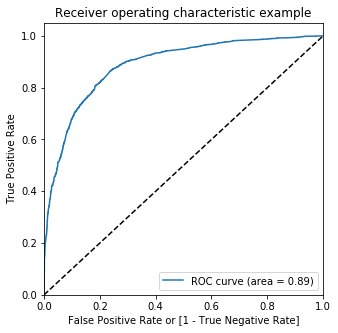

In [766]:
# Drawing the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

The ROC Curve for this model is following the left-hand border and then the top border of the ROC space verty closely. This indicates a good accuracy for the test. The area under the curve is around 0.89 which is a good value to take this model forward for analysis. 

## 5.2 - Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [767]:
# Let's create columns with different probability cutoffs 
# we will take a range at 0.05 for more granular details 

numbers = [float(x)/100 for x in range(0, 91, 5)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9
0,0,0.302988,1871,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.243956,6795,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.350648,3516,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.840206,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.184824,3934,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [768]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/100 for x in range(0, 91, 5)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df)

      prob  accuracy     sensi     speci     preci
0.00  0.00  0.381262  1.000000  0.000000  0.381262
0.05  0.05  0.473871  0.992295  0.154423  0.419654
0.10  0.10  0.615028  0.967153  0.398051  0.497497
0.15  0.15  0.710266  0.940389  0.568466  0.573159
0.20  0.20  0.772109  0.906732  0.689155  0.642529
0.25  0.25  0.792053  0.881184  0.737131  0.673798
0.30  0.30  0.801330  0.865775  0.761619  0.691162
0.35  0.35  0.811843  0.811030  0.812344  0.727008
0.40  0.40  0.814162  0.767234  0.843078  0.750794
0.45  0.45  0.818182  0.732360  0.871064  0.777778
0.50  0.50  0.818955  0.701946  0.891054  0.798800
0.55  0.55  0.814162  0.667883  0.904298  0.811330
0.60  0.60  0.808442  0.631792  0.917291  0.824775
0.65  0.65  0.791435  0.560016  0.934033  0.839514
0.70  0.70  0.784941  0.527575  0.943528  0.851997
0.75  0.75  0.771336  0.470803  0.956522  0.869663
0.80  0.80  0.761441  0.423763  0.969515  0.895458
0.85  0.85  0.741033  0.352393  0.980510  0.917635
0.90  0.90  0.721243  0.287916 

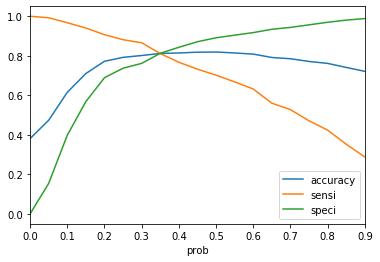

In [769]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve and the table displayed above, 0.35 is the optimum point to take it as a cutoff probability. Let's now do the predictions on the train data set using this probability cutoff.

In [770]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,final_predicted
0,0,0.302988,1871,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.243956,6795,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.350648,3516,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.840206,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.184824,3934,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [771]:
# Let's check the overall accuracy.
print('Accuracy : ' + str(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))

Accuracy : 0.8118429189857761


In [772]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3251,  751],
       [ 466, 2000]], dtype=int64)

In [773]:
# Let's calculate all the other metrics
calculate_all_Metrics(confusion2)

Sensitivity or Recall : 0.8110300081103001
Specificity : 0.8123438280859571
Precision : 0.7270083605961468
False Positive Rate : 0.187656171914043
Negative Predictive Value : 0.8746300780199086


##### Now Let's calculate the lead score for the Train data set 

Calculating the Lead score now. The score can be calculated by simply multiplying the Conversion probability by 100. We have a choice to round the number to zero decimals. We are leaving it to 2 decimals for now to get an exact comparison as rounding will revoke the ability to be able to chose between two leads which may have same score pre decimal points.  

In [774]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100,2))

y_train_pred_final.head(10)

,Converted,Convert_Prob,CustID,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,final_predicted,Lead_Score
0,0,0.302988,1871,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,30.30
1,0,0.243956,6795,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.40
2,0,0.350648,3516,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,35.06
3,0,0.840206,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,84.02
4,0,0.184824,3934,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.48
5,1,0.991300,4844,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,99.13
6,0,0.124144,3297,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.41
7,1,0.984965,8071,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,98.50
8,0,0.144461,987,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.45
9,1,0.935816,7423,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,93.58


## 5.3 - Precision and Recall

In [775]:
#Looking at the confusion matrix again

In [776]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3566,  436],
       [ 735, 1731]], dtype=int64)

##### Precision
TP / TP + FP

In [777]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7988001845869867

##### Recall
TP / TP + FN

In [778]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7019464720194647

### Precision and recall tradeoff

In [779]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

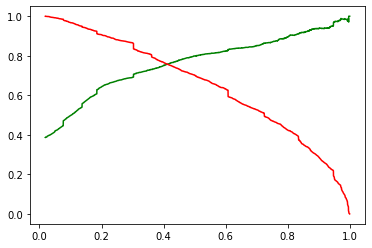

In [780]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The Cut-off is recommended to be at 0.4 based on the precision and recall trade off. However the recall value ( also known as Sensitivity ) will be less than 80% at this value which does not meet the business requirements. Hence we will use the cut-off as 0.35 based on the Sensitivity and Specificity curve 

# Step 6: Making predictions and validations on the test set

In [781]:
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [782]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_sm = add_constant(X_test_new)

Making predictions on the test set

In [783]:
y_test_pred = lm_final.predict(X_test_sm)

In [784]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [785]:
# Let's see the head
y_pred_1.head()

,0
4269,0.632664
2376,0.947170
7766,0.929315
9199,0.184824
4359,0.834243


In [786]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [787]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [788]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [789]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [790]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.632664
1,1,2376,0.947170
2,1,7766,0.929315
3,0,9199,0.184824
4,1,4359,0.834243


In [791]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [792]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Convert_Prob'], axis=1)

In [793]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Convert_Prob
0,4269,1,0.632664
1,2376,1,0.947170
2,7766,1,0.929315
3,9199,0,0.184824
4,4359,1,0.834243


In [794]:
# Deriving the final Predicted values using the probability cutoff of 0.35 
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [795]:
y_pred_final.head()

,CustID,Converted,Convert_Prob,final_predicted
0,4269,1,0.632664,1
1,2376,1,0.947170,1
2,7766,1,0.929315,1
3,9199,0,0.184824,0
4,4359,1,0.834243,1


In [796]:
# Let's check the overall accuracy.
print('Accuracy : ' + str(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)))

Accuracy : 0.8152958152958153


In [797]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1373,  304],
       [ 208,  887]], dtype=int64)

In [798]:
calculate_all_Metrics(confusion2)

Sensitivity or Recall : 0.8100456621004566
Specificity : 0.8187239117471675
Precision : 0.744752308984047
False Positive Rate : 0.18127608825283245
Negative Predictive Value : 0.868437697659709


#### We can see that the different metrics of Accuracy , Sensitivity, Specificity , Precision etc derived post predictions on the test data set are almost same as the values derived on the test data set. Hence we can conclude that the model is good to be used for predicting the conversion rate for the customers based on the business requirements.  

In [799]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100,2))

y_train_pred_final.head(10)

,Converted,Convert_Prob,CustID,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,final_predicted,Lead_Score
0,0,0.302988,1871,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,30.30
1,0,0.243956,6795,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.40
2,0,0.350648,3516,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,35.06
3,0,0.840206,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,84.02
4,0,0.184824,3934,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.48
5,1,0.991300,4844,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,99.13
6,0,0.124144,3297,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.41
7,1,0.984965,8071,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,98.50
8,0,0.144461,987,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.45
9,1,0.935816,7423,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,93.58
